<a href="https://colab.research.google.com/github/pruthviraz/Customer-Purchase-Prediction/blob/main/ML_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries that are required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score

# visualise of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
# Importing data Set from Kaggle
# ( https://www.kaggle.com/code/arezalo/customer-behaviour-prediction-naive-bayes/input?select=Customer_Behaviour.csv )

data = pd.read_csv("/content/Customer_Behaviour.csv")

In [ ]:
print(data)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [ ]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.shape

(400, 5)

In [ ]:
data.size

2000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df = pd.DataFrame(data)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
## Checking for null values
df.isnull().sum()

## there are no missing values

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
# checking unqiue values in each column
for col in df.columns:
  print(f'{col}: {df[col].unique()}')

User ID: [15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829
 15600575 15727311 15570769 15606274 15746139 15704987 15628972 15697686
 15733883 15617482 15704583 15621083 15649487 15736760 15714658 15599081
 15705113 15631159 15792818 15633531 15744529 15669656 15581198 15729054
 15573452 15776733 15724858 15713144 15690188 15689425 15671766 15782806
 15764419 15591915 15772798 15792008 15715541 15639277 15798850 15776348
 15727696 15793813 15694395 15764195 15744919 15671655 15654901 15649136
 15775562 15807481 15642885 15789109 15814004 15673619 15595135 15583681
 15605000 15718071 15679760 15654574 15577178 15595324 15756932 15726358
 15595228 15782530 15592877 15651983 15746737 15774179 15667265 15655123
 15595917 15668385 15709476 15711218 15798659 15663939 15694946 15631912
 15768816 15682268 15684801 15636428 15809823 15699284 15786993 15709441
 15710257 15582492 15575694 15756820 15766289 15593014 15584545 15675949
 15672091 15801658 15706185 15789863 15720

In [ ]:
# Drop User ID as it is not useful
df = df.drop(columns=["User ID"])

In [ ]:
# Encode Gender column
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

In [ ]:
# Define features and target
X = df.drop(columns=["Purchased"])
y = df["Purchased"]

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

In [ ]:
# Train model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions
dt_pred = decision_tree.predict(X_test)

In [ ]:
# Evaluate model
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("F1 Score:", f1_score(y_test, dt_pred))
print("Precision Score:", precision_score(y_test, dt_pred))

Decision Tree Accuracy: 0.85
Confusion Matrix:
 [[47  5]
 [ 7 21]]
F1 Score: 0.7777777777777778
Precision Score: 0.8076923076923077


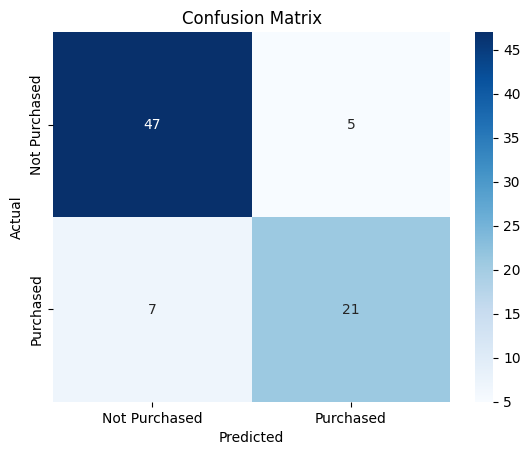

In [ ]:
cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Randomn Forest

# Initialize Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train model
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
rf_pred = random_forest.predict(X_test)

In [ ]:
# Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))
print("Precision Score:", precision_score(y_test, rf_pred))

Random Forest Accuracy: 0.8875
Confusion Matrix:
 [[47  5]
 [ 4 24]]
F1 Score: 0.8421052631578947
Precision Score: 0.8275862068965517


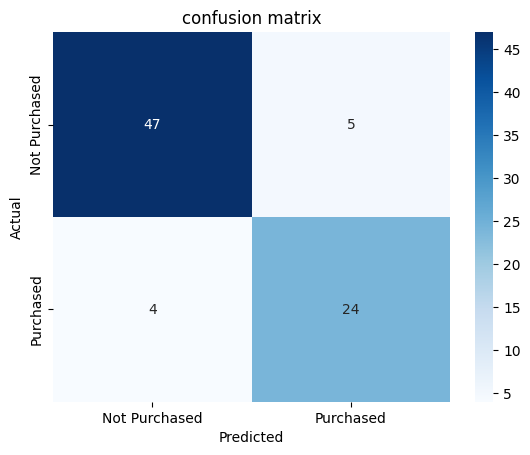

In [ ]:
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion matrix')
plt.show()

In [ ]:
# KNN
# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Train model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions
knn_pred = knn.predict(X_test)

In [ ]:
# Evaluate model
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("F1 Score:", f1_score(y_test, knn_pred))
print("Precision Score:", precision_score(y_test, knn_pred))

KNN Accuracy: 0.925
Confusion Matrix:
 [[48  4]
 [ 2 26]]
F1 Score: 0.896551724137931
Precision Score: 0.8666666666666667


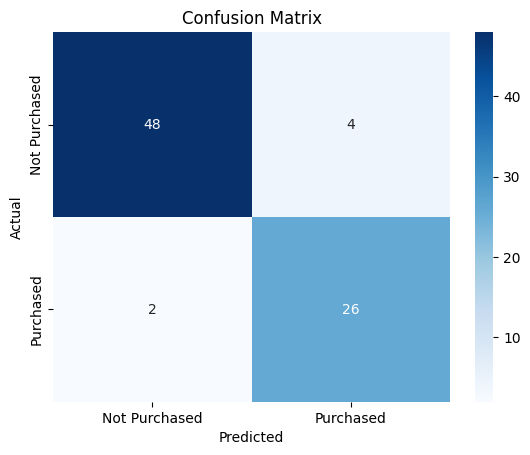

In [ ]:
cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Logistic Regresion

# Initialize Logistic Regression model
logistic_regression = LogisticRegression()

# Train model
logistic_regression.fit(X_train, y_train)

# Make predictions
lr_pred = logistic_regression.predict(X_test)

# Evaluate model
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("F1 Score:", f1_score(y_test, lr_pred))
print("Precision Score:", precision_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.8875
Confusion Matrix:
 [[50  2]
 [ 7 21]]
F1 Score: 0.8235294117647058
Precision Score: 0.9130434782608695


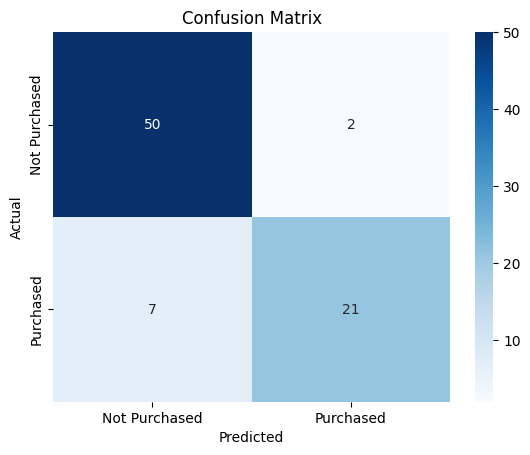

In [ ]:
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()